In [2]:
train_root = "COVID-19_cut (train test split)/train"
val_root = "COVID-19_cut (train test split)/val"
test_root = "COVID-19_cut (train test split)/test"

In [3]:
batch_size = 10

from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (256, 256), batch_size = batch_size, shuffle = False)
val_data = Generator.flow_from_directory(val_root, (256, 256), batch_size = batch_size, shuffle = False,)
test_data = Generator.flow_from_directory(test_root, (256, 256), batch_size = batch_size, shuffle = False)

Found 10672 images belonging to 3 classes.
Found 1523 images belonging to 3 classes.
Found 3052 images belonging to 3 classes.


3


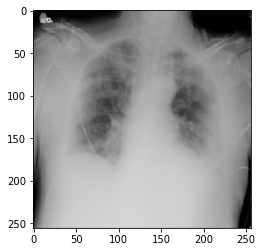

In [4]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][0]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)


In [19]:
train_data.n

10672

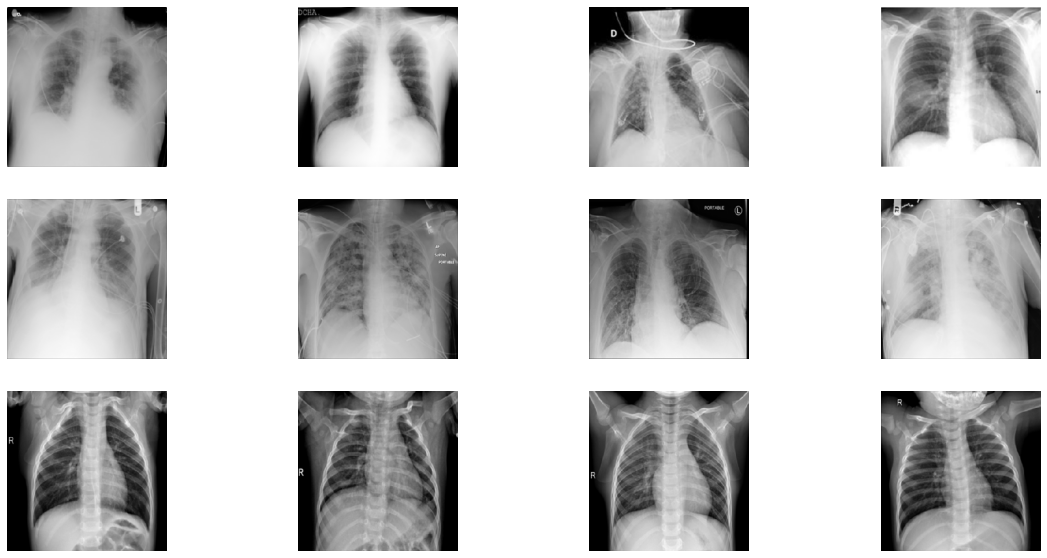

In [28]:
import numpy as np
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    if i < 5:
        im = train_data[0][0][i-1]
    elif i < 9:
        im = train_data[300][0][i-5]
    else:
        im = train_data[700][0][i-10]
    img = tf.keras.preprocessing.image.array_to_img(im)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [40]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu',padding="same"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0))

model.add(Conv2D(32, (3, 3), activation='relu',padding="same"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0))

model.add(Conv2D(64, (3, 3),activation='relu',padding="same"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0))

model.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu',padding="same"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))


model.add(Conv2D(256, (3, 3), activation='relu',padding="same"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))



model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0))

model.add(Dense(num_classes, activation="softmax"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 64, 64, 32)       

In [41]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0005, patience=8, verbose=1, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3, min_delta=0.002,verbose=1),
    #tf.keras.callbacks.ModelCheckpoint(filepath='model_{epoch:02d}-{val_accuracy:.2f}.hdf5', monitor='val_accuracy', save_best_only=True, verbose=1)
]

In [42]:
#remove optimizer if needed
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(train_data, batch_size = batch_size, epochs=50, validation_data=val_data, callbacks=my_callbacks)


Epoch 1/50
1068/1068 [==============================] - 40s 37ms/step - loss: 1.3902 - accuracy: 0.5387 - val_loss: 0.9236 - val_accuracy: 0.5318 - lr: 0.0010
Epoch 2/50
1068/1068 [==============================] - 42s 40ms/step - loss: 0.7467 - accuracy: 0.6705 - val_loss: 0.6542 - val_accuracy: 0.7170 - lr: 0.0010
Epoch 3/50
1068/1068 [==============================] - 42s 40ms/step - loss: 0.6624 - accuracy: 0.7135 - val_loss: 0.6204 - val_accuracy: 0.7511 - lr: 0.0010
Epoch 4/50
1068/1068 [==============================] - 42s 40ms/step - loss: 0.5848 - accuracy: 0.7618 - val_loss: 0.5425 - val_accuracy: 0.7774 - lr: 0.0010
Epoch 5/50
1068/1068 [==============================] - 43s 40ms/step - loss: 0.5166 - accuracy: 0.7915 - val_loss: 0.4626 - val_accuracy: 0.8030 - lr: 0.0010
Epoch 6/50
1068/1068 [==============================] - 43s 40ms/step - loss: 0.4777 - accuracy: 0.8076 - val_loss: 0.4690 - val_accuracy: 0.8043 - lr: 0.0010
Epoch 7/50
1068/1068 [========================

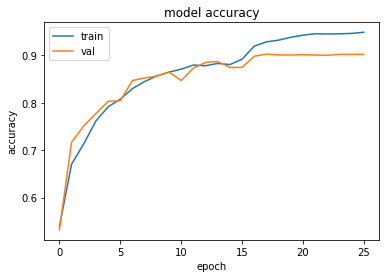

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

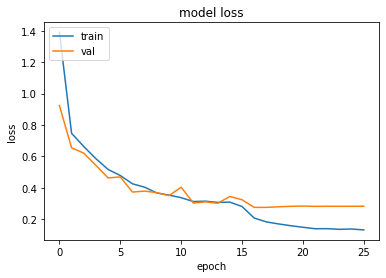

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


306/306 [==============================] - 8s 25ms/step


<AxesSubplot:>

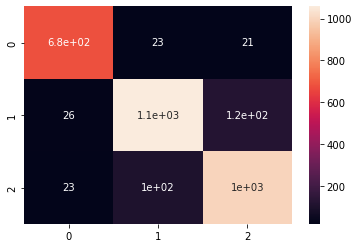

In [45]:
import seaborn as sns
import numpy as np
predict_x = model.predict(test_data) 
pred = np.argmax(predict_x,axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.classes, pred)
sns.heatmap(cm, annot=True)


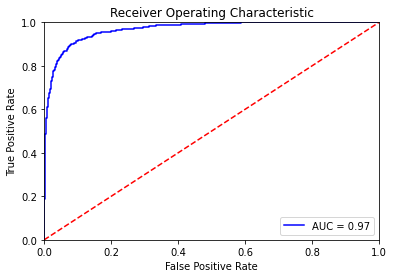

In [46]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = predict_x
# print(probs)
# print(probs.shape)
preds = probs[:,1]
# print(preds)
# print(preds.shape)
# print(test_data.classes.shape)
fpr, tpr, threshold = metrics.roc_curve(test_data.classes, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
print((cm[0,0]+cm[1,1]+cm[2,2])/(sum(sum(cm))))

0.8961336828309305
